# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler 
%matplotlib inline\

bs =32

validation_percentage = 0.1
data_dir = '/data/landmark_images/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')


rand_trans = transforms.RandomApply([ transforms.RandomRotation(degrees=120),transforms.RandomHorizontalFlip(p=0.9)],p=0.4)


train_transform = transforms.Compose([transforms.Resize(256), 
                                     transforms.CenterCrop(256),
                                        rand_trans,
                                     transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


valid_test_transform = transforms.Compose([transforms.Resize(256), 
                                           transforms.CenterCrop(256),
                                     transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(train_dir, transform=valid_test_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))


validation_indices= np.random.choice(len(train_data),(int)(len(train_data)*validation_percentage))
train_indices = list(set(range(len(train_data)))-set(validation_indices))



val_sample = SubsetRandomSampler(validation_indices)
train_sample = SubsetRandomSampler(train_indices)


train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=bs, num_workers=0, shuffle=False, sampler=train_sample)
val_loader = torch.utils.data.DataLoader(dataset=valid_data, batch_size=bs, num_workers=0, shuffle=False, sampler=val_sample)


test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=bs, num_workers=0, shuffle=True)
loaders_scratch = {'train': train_loader, 'valid': val_loader, 'test': test_loader}




Num training images:  4996
Num test images:  1250


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: For all three datasets, I only resized images so they can be fed to the network with no errors and I normalized their values. For the training only, I defined some random transformations which include random rotations of 120 degrees and horizontal flips that will happen with probability 0.4 on each image. This way, the algorithm I will define later on will be robust against angle changes of the objects in the pictures. 

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [14]:

#Got this code from PyTorch forums: https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821
#This code will be used to undo the normalization so RGB values will be in the proper range for display
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

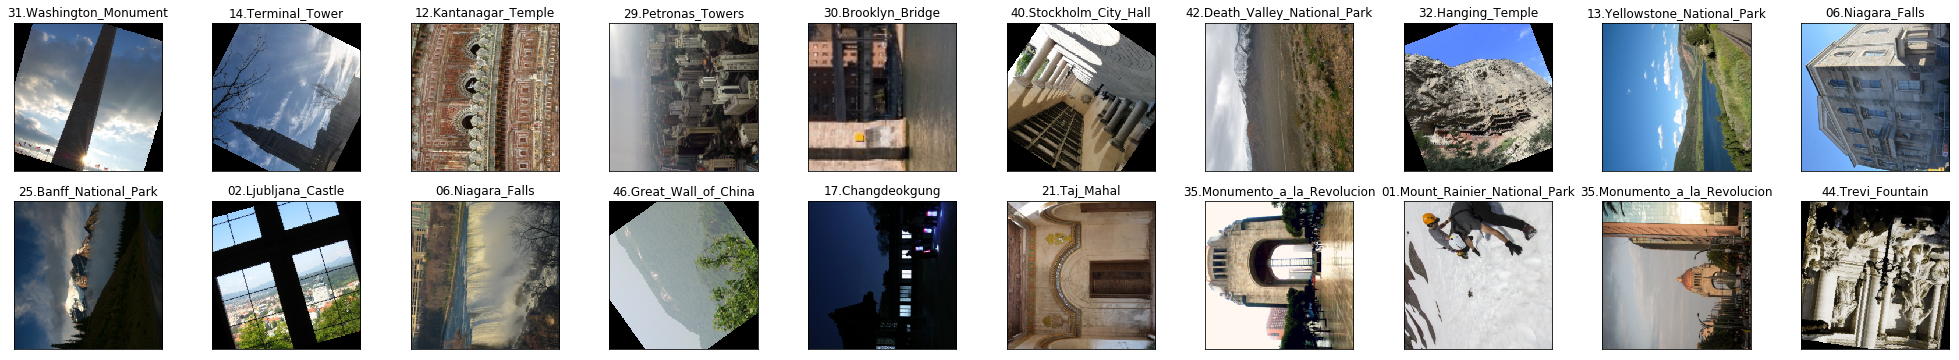

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# images = images.numpy()


# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(35, 6))
for idx in np.arange(20):
    
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    
    unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    img= unorm(images[idx])

    img = torch.transpose(img, 0,2)
#     print(img.shape)
    ax.imshow(np.squeeze(img), cmap='ocean')
   
    ax.set_title(train_data.classes[labels[idx].item()])


### Initialize use_cuda variable

In [5]:
# useful variable that tells us whether we should use the GPU
import torch
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [6]:
## TODO: select loss function
import torch.nn as nn
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    return torch.optim.SGD(model.parameters(), lr=0.01)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [7]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 4, stride=2, padding=1)
        
        self.conv2 = nn.Conv2d(16, 32, 4, stride=2, padding=1)
        
        self.conv3 = nn.Conv2d(32, 64, 4, stride=2, padding=1)
        
        self.fc1 = nn.Linear(64 * 4 * 4, 500)

        self.fc2 = nn.Linear(500, 50)
        self.dropout_conv = nn.Dropout(0.2)
        self.dropout_fc = nn.Dropout(0.4)
        
        self.pool = nn.MaxPool2d(2,2)
        
        
        
        
    
    def forward(self, x):
        
        x= self.pool(F.relu(self.conv1(x)))
        x=self.dropout_conv(x)
        x= self.pool(F.relu(self.conv2(x)))
        x=self.dropout_conv(x)
        x= self.pool(F.relu(self.conv3(x)))
        x=self.dropout_conv(x)
        x = x.view(-1, 64 * 4 * 4)
        x= F.relu(self.fc1(x))
        x=self.dropout_fc(x)
        x= self.fc2(x)

        ## Define forward behavior

        
        
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()


__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  The input images are 256x256. The reason why is that anything smaller would give me blurry pictures with low resolution and I thought this would decrease the performance of my CNN. Since this is quite large, I wanted to shrink the image sizes a lot (to 4x4, which I found that works well). I also know that MaxPool layers with input 2,2 works quite well. Therefore, since I wanted to use 2-3 conv layers, I also needed to shrink the images sizes by half at the convoluational layers. I was able to achieve this with stride=2, padding=1 and filter size=4. The number of channels are not too big and not too small, they are increasing as we move towards the fully connected layers, which is a good rule of thumb I found after doing some research. I used relu activation for the hidden layers as it was established that it was a good idea to do so by researchers. Since this is a classification task, I used the CrossEntropyLoss, which combines the Negative Likelihood Loss and LogSoftmax functions. That is why I did not explicitly specify an activation function at the last FC layer in the architecture.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [8]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss_train =criterion(output, target)
            loss_train.backward()
            
            optimizer.step()
            train_loss += loss_train.item()*data.size(0)
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))


            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss_valid = criterion(output, target)
            valid_loss += loss_valid.item()*data.size(0)
            ## TODO: update average validation loss 


            
            
        train_loss = train_loss/len(loaders['train'].sampler)
        valid_loss = valid_loss/len(loaders['valid'].sampler)
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        

        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [18]:
def custom_weight_init(m):
    
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.917518 	Validation Loss: 3.908836
Validation loss decreased (inf --> 3.908836).  Saving model ...
Epoch: 2 	Training Loss: 3.909529 	Validation Loss: 3.904746
Validation loss decreased (3.908836 --> 3.904746).  Saving model ...
Epoch: 3 	Training Loss: 3.902468 	Validation Loss: 3.894906
Validation loss decreased (3.904746 --> 3.894906).  Saving model ...
Epoch: 4 	Training Loss: 3.884199 	Validation Loss: 3.864849
Validation loss decreased (3.894906 --> 3.864849).  Saving model ...
Epoch: 5 	Training Loss: 3.863726 	Validation Loss: 3.826000
Validation loss decreased (3.864849 --> 3.826000).  Saving model ...
Epoch: 6 	Training Loss: 3.819113 	Validation Loss: 3.798011
Validation loss decreased (3.826000 --> 3.798011).  Saving model ...
Epoch: 7 	Training Loss: 3.795795 	Validation Loss: 3.764864
Validation loss decreased (3.798011 --> 3.764864).  Saving model ...
Epoch: 8 	Training Loss: 3.761839 	Validation Loss: 3.740200
Validation loss decreased (3.76486

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [20]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.916121 	Validation Loss: 3.910951
Validation loss decreased (inf --> 3.910951).  Saving model ...
Epoch: 2 	Training Loss: 3.907973 	Validation Loss: 3.908545
Validation loss decreased (3.910951 --> 3.908545).  Saving model ...
Epoch: 3 	Training Loss: 3.901047 	Validation Loss: 3.901341
Validation loss decreased (3.908545 --> 3.901341).  Saving model ...
Epoch: 4 	Training Loss: 3.873793 	Validation Loss: 3.866498
Validation loss decreased (3.901341 --> 3.866498).  Saving model ...
Epoch: 5 	Training Loss: 3.818794 	Validation Loss: 3.797687
Validation loss decreased (3.866498 --> 3.797687).  Saving model ...
Epoch: 6 	Training Loss: 3.778781 	Validation Loss: 3.766591
Validation loss decreased (3.797687 --> 3.766591).  Saving model ...
Epoch: 7 	Training Loss: 3.747112 	Validation Loss: 3.743333
Validation loss decreased (3.766591 --> 3.743333).  Saving model ...
Epoch: 8 	Training Loss: 3.717865 	Validation Loss: 3.729632
Validation loss decreased (3.74333

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy

model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.497980


Test Accuracy: 38% (475/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler 
import torch.nn as nn


data_dir = '/data/landmark_images/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

rand_trans = transforms.RandomApply([ transforms.RandomRotation(degrees=120),transforms.RandomHorizontalFlip(p=0.9)],p=0.4)
preprocess_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    rand_trans,
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

valid_test_transform = transforms.Compose([transforms.Resize(256), 
                                           transforms.CenterCrop(224),
                                     transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])




bs=32

validation_percentage =0.1
train_data = datasets.ImageFolder(train_dir, transform=preprocess_train)
valid_data = datasets.ImageFolder(train_dir, transform=valid_test_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_transform)


validation_indices_trans= np.random.choice(len(train_data),(int)(len(train_data)*validation_percentage))
train_indices_trans = list(set(range(len(train_data)))-set(validation_indices_trans))



val_sample_trans = SubsetRandomSampler(validation_indices_trans)
train_sample_trans=SubsetRandomSampler(train_indices_trans)

train_loader_trans = torch.utils.data.DataLoader(dataset=train_data, batch_size=bs, num_workers=0, shuffle=False, sampler=train_sample_trans)
val_loader_trans = torch.utils.data.DataLoader(dataset=valid_data, batch_size=bs, num_workers=0, shuffle=False, sampler=val_sample_trans)


test_loader_trans = torch.utils.data.DataLoader(dataset=test_data, batch_size=bs, num_workers=0, shuffle=True)


loaders_transfer = {'train': train_loader_trans, 'valid': val_loader_trans, 'test': test_loader_trans}



# use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [23]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    return torch.optim.Adam(model.fc.parameters(), lr=0.003)

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [25]:
## TODO: Specify model architecture
import torchvision.models as models
model_transfer = models.resnet50(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False

n_inputs = model_transfer.fc.in_features
last_layer = nn.Linear(n_inputs, 50)
model_transfer.fc = last_layer

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()
    
# print(model_transfer)

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  The architecture family ResNet is made up of residual blocks, which allow the deeper layers to access and use the activation values from the previous layers. This added functionality deeply enhances the capability of the network without increasing its size. Therefore, ResNet is a poweful architecture with varying sizes.  Resnet18 is the smallest architecture in this family that is offered by torchvision. At first, I wanted to give it a try. In the past, I used it for CIFAR100 dataset and it worked well. Then, I did a little research and changed my mind since Resnet50 is a bit larger and has better generalization capabilities. 

Since the pretrained networks in torchvision library are trained using ImageNet, which is a much larger dataset than the one I am working on right now, I decided to keep the pretrained weights in the feature extractor as they were and froze them. However, since ImageNet has 1000 classes, the classifier part of the model would not fit my needs (I need to classify among 50 classes.) Thus, I removed the last layer, which can be accessed as ```model_transfer.fc```, I created a new linear layer with the same input dimension as the previous classifier layer and with output dimension 50 and added that layer to the network. Finally, I passed only the parameters of the newly added layer to the optimizer so only they would be optimized as the training progresses. Freezing the feature extractor weights had a tremendously positive impact on the model performance.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'



model_transfer= model_transfer.to("cuda")
model_to_save = train(10, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), criterion_transfer, use_cuda, 'model_transfer.pt')
#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy



model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.598540 	Validation Loss: 1.280880
Validation loss decreased (inf --> 1.280880).  Saving model ...
Epoch: 2 	Training Loss: 1.583044 	Validation Loss: 1.147477
Validation loss decreased (1.280880 --> 1.147477).  Saving model ...
Epoch: 3 	Training Loss: 1.405191 	Validation Loss: 1.135375
Validation loss decreased (1.147477 --> 1.135375).  Saving model ...
Epoch: 4 	Training Loss: 1.357107 	Validation Loss: 1.107151
Validation loss decreased (1.135375 --> 1.107151).  Saving model ...
Epoch: 5 	Training Loss: 1.227000 	Validation Loss: 1.080597
Validation loss decreased (1.107151 --> 1.080597).  Saving model ...
Epoch: 6 	Training Loss: 1.209151 	Validation Loss: 1.092578
Epoch: 7 	Training Loss: 1.150004 	Validation Loss: 1.130648
Epoch: 8 	Training Loss: 1.085442 	Validation Loss: 1.130202
Epoch: 9 	Training Loss: 1.086407 	Validation Loss: 1.175440
Epoch: 10 	Training Loss: 1.010835 	Validation Loss: 1.189167


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.116752


Test Accuracy: 72% (908/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [28]:
import cv2
from PIL import Image
from torchvision.transforms import ToTensor
## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    im=Image.open(img_path)#.unsqueeze(0)
    
    preprocess = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ])

    img = preprocess(im)
    img = img.to("cuda")
    img = img.reshape(1, 3, 224,224)
    model_transfer.eval()
    preds, indices=  torch.topk(model_transfer(img),5)
#     print(indices.shape)
    res =[]
    for i in range(k):
        res.append(train_data.classes[indices[0][i]])
        
    return res
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['09.Golden_Gate_Bridge',
 '30.Brooklyn_Bridge',
 '38.Forth_Bridge',
 '28.Sydney_Harbour_Bridge',
 '26.Pont_du_Gard']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

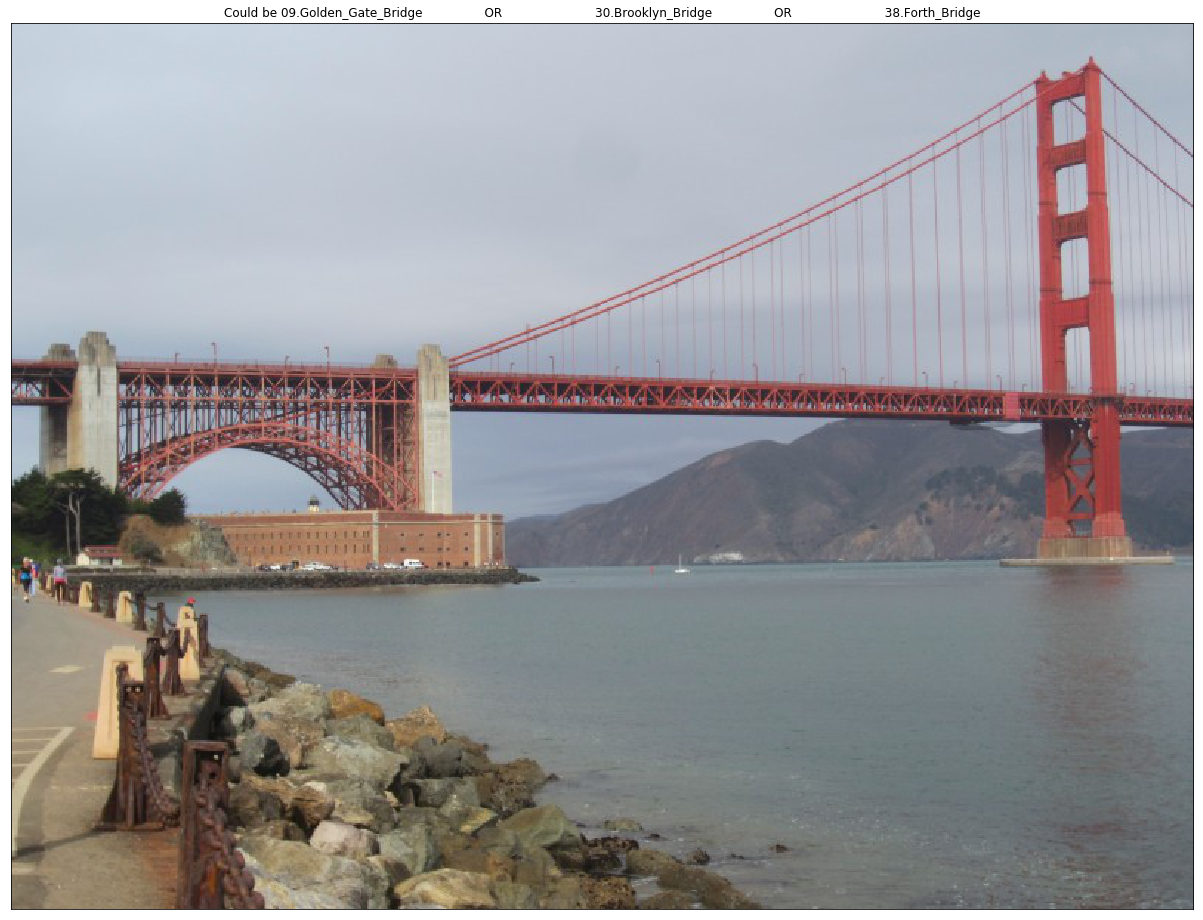

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    im=Image.open(img_path)#.unsqueeze(0)
    
    preprocess = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ])

    img = preprocess(im)
    fig = plt.figure(figsize=(250, 70))
    
    
    ax = fig.add_subplot(2, 20/2, 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(im), cmap='ocean')
    title ="Could be "
    for i in range(len(predicted_landmarks)):
        title += predicted_landmarks[i]
        if i<len(predicted_landmarks)-1:
            title+="                OR                        "
    ax.set_title(title)
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The algorithm was able to classify a picture of the Eiffel Tower taken far away with trees in the picture. Previously, before I freezed the weights of pretrained Resnet50, the algorithm was unable to recognize Eiffel Tower. Freezing the pretrained weights of the feature extraction part of Resnet really improved the predictions. I also tried out pictures of vienna and stockholm city halls, which were very well recognized. I also tried a funny picture of the Temple of Olympian Zeus, which the algorithm was able to correctly identify. So overall, I am happy with the outcome. 

In summary, my takeaways are:
1. Procure a more representative dataset if possible
2. Apply more data augmentation and transformation techniques on the data
3. Use a deeper network. 

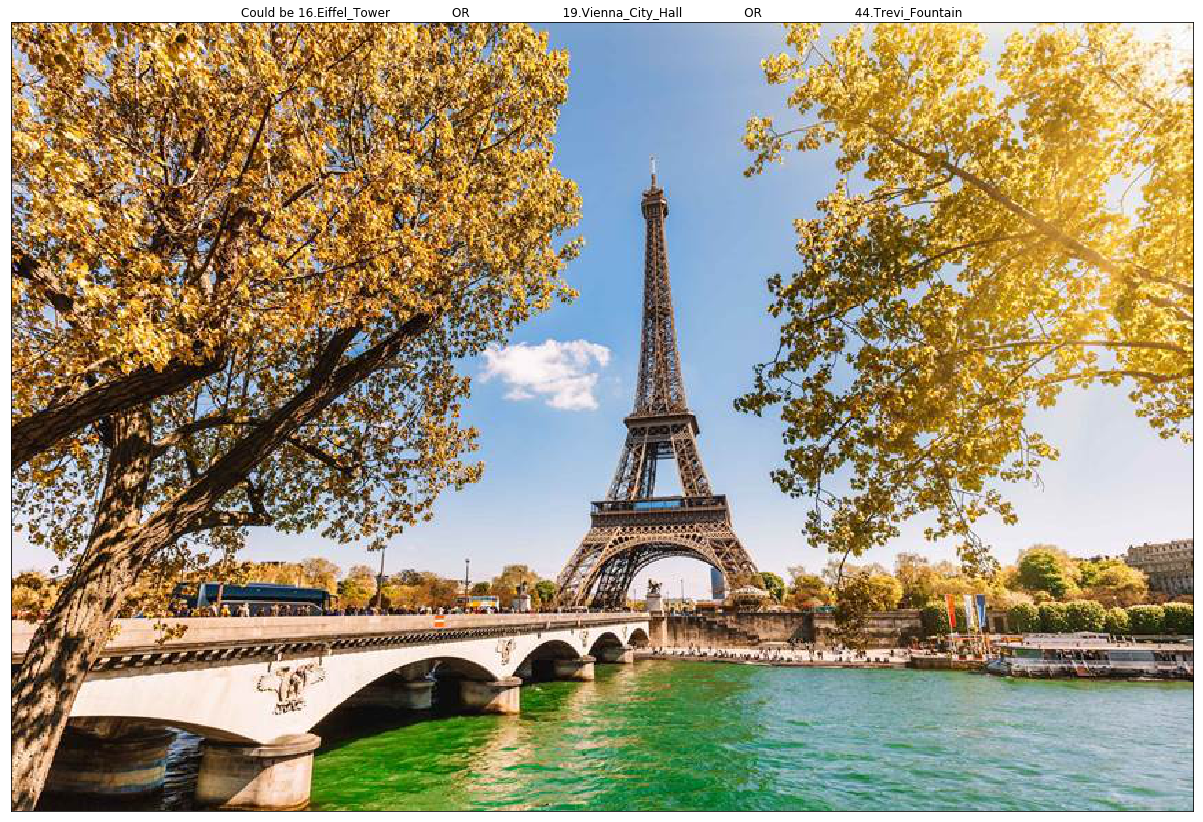

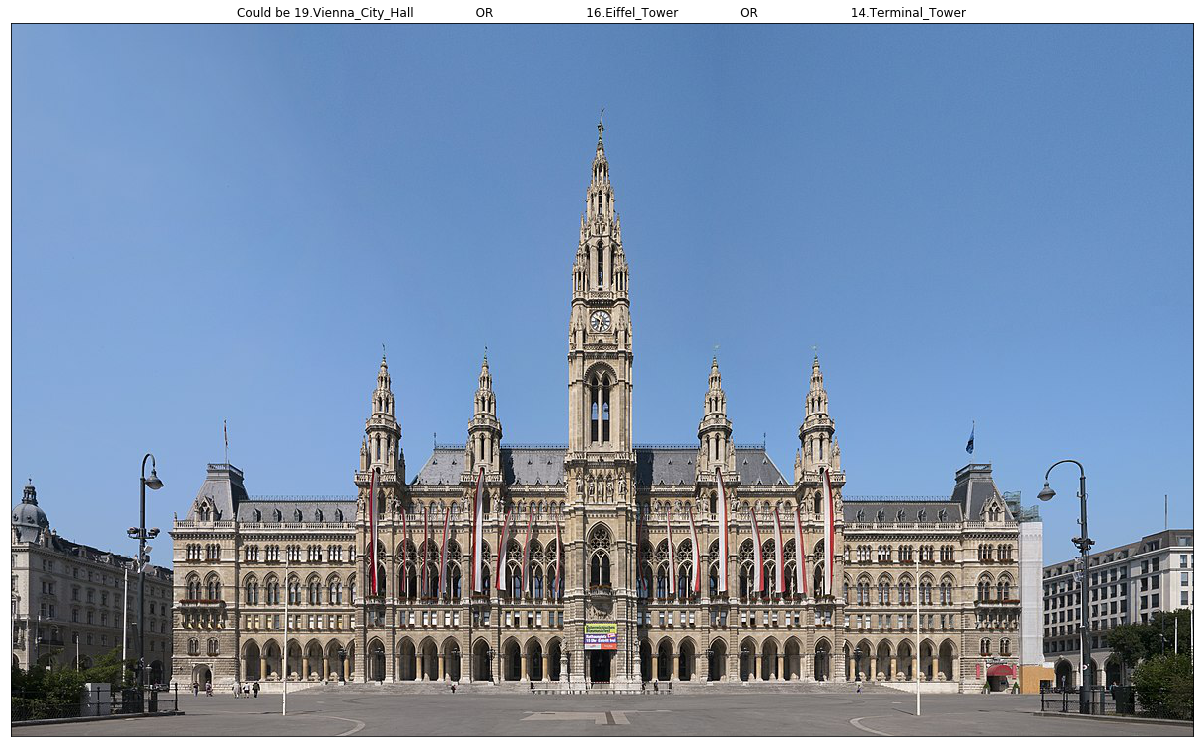

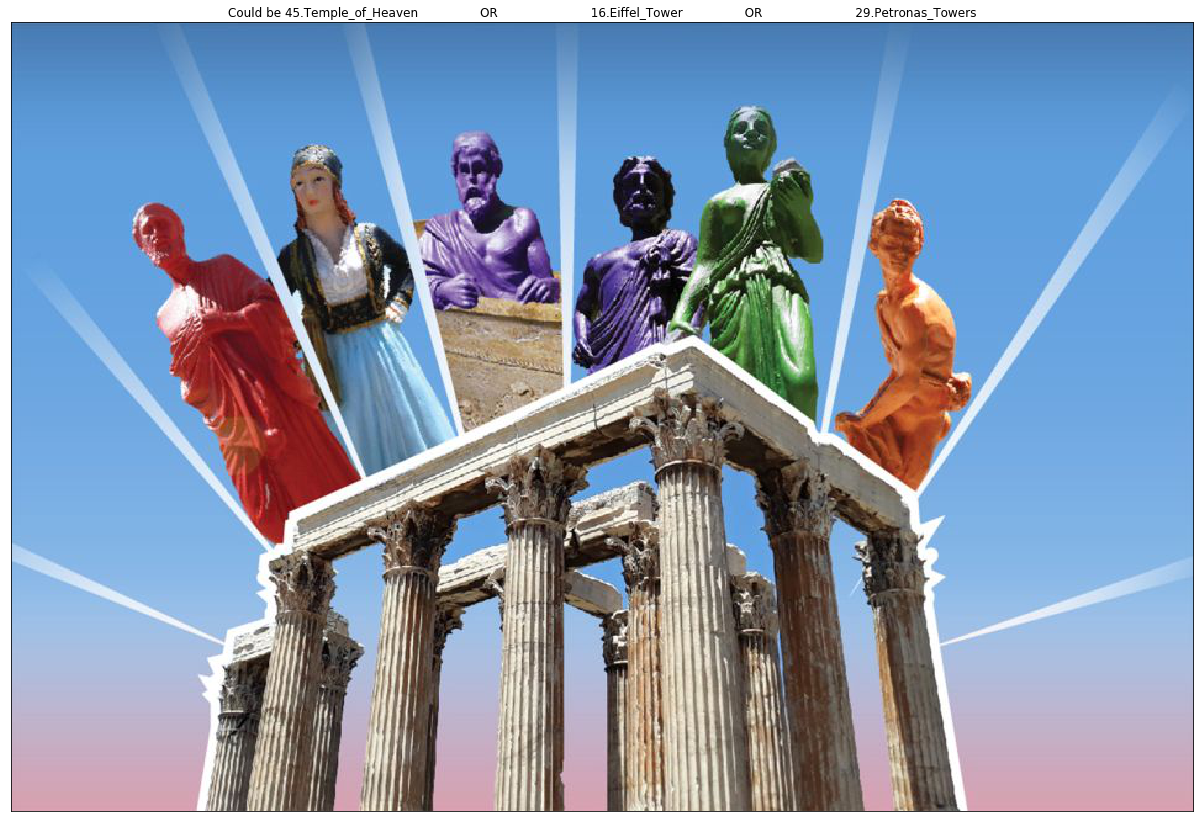

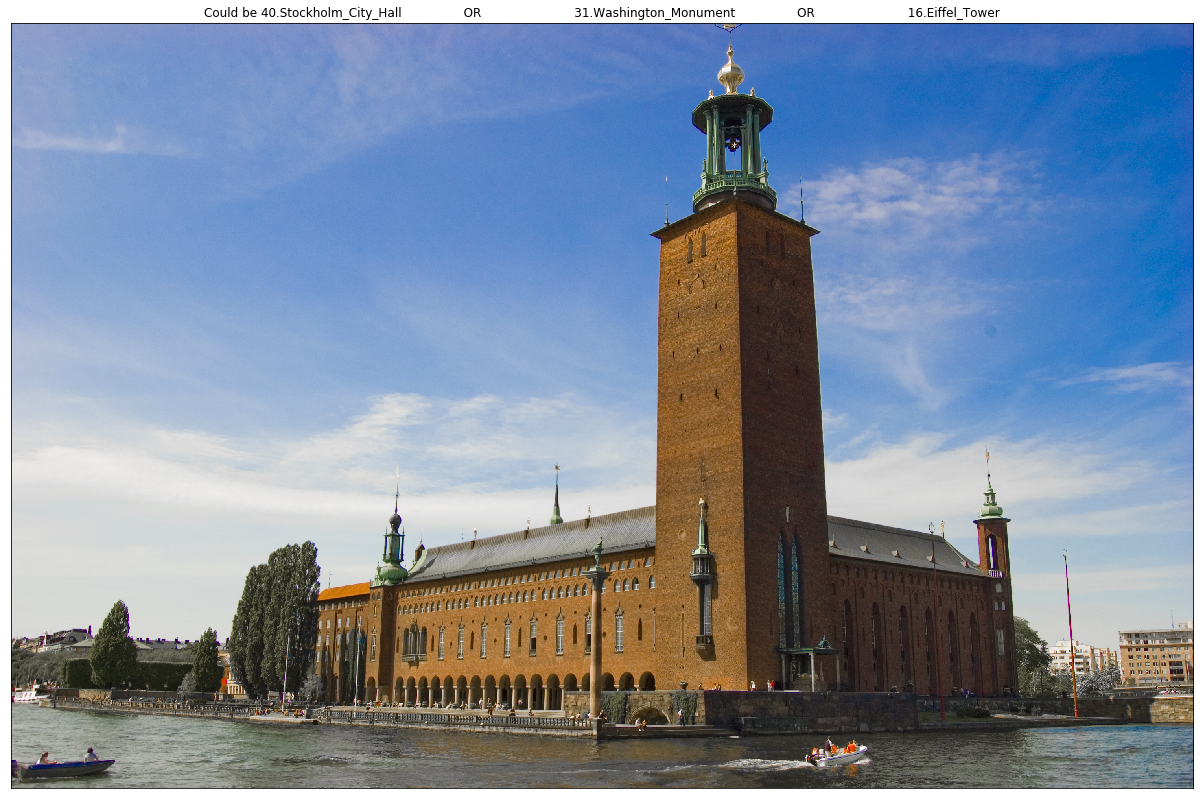

In [30]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
# print(train_data.classes)
suggest_locations('france-eiffel-tower-paris.jpg')
suggest_locations('Wien.jpg')
suggest_locations('145.jpg')
suggest_locations("Townhallstockholm.jpg")